# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
e_products = pd.read_csv('product_category_name_translation.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
products = pd.merge(products, e_products, on = 'product_category_name', how = 'outer').drop(columns = 'product_category_name')

In [4]:
order_items['Revenue'] = order_items['price'] + order_items['freight_value']
Revenue_of_sellers = order_items.groupby('seller_id')[['Revenue']].sum()

In [5]:
Revenue_of_sellers.reset_index().sort_values('Revenue', ascending = False)

,seller_id,Revenue
857,4869f7a5dfa277a7dca6462dcf3b52b2,249640.70
1535,7c67e1448b00f6e969d365cea6b010ab,239536.44
1013,53243585a1d6dc2643021fd1853d8905,235856.68
881,4a3ca9315b744ce9f8e9374361493884,235539.96
3024,fa1c13f2614d7b5c4749cbc52fecda94,204084.73
...,...,...
1370,702835e4b785b67a084280efca355756,18.56
869,4965a7002cca77301c82d3f91b82e1a9,16.36
373,1fa2d3def6adfa70e58c276bb64fe5bb,15.90
1465,77128dec4bec4878c37ab7d6169d6f26,15.22


In [6]:
order_items_1 = pd.merge(order_items, products, on = 'product_id', how = 'inner')
order_items_1.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Revenue,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [7]:
product_category_revenue = order_items_1.groupby('product_category_name_english')[['Revenue']].sum().sort_values('Revenue',ascending =False)
product_category_revenue.head(10)

,Revenue
product_category_name_english,
health_beauty,1441248.07
watches_gifts,1305541.61
bed_bath_table,1241681.72
sports_leisure,1156656.48
computers_accessories,1059272.40
furniture_decor,902511.79
housewares,778397.77
cool_stuff,719329.95
auto,685384.32


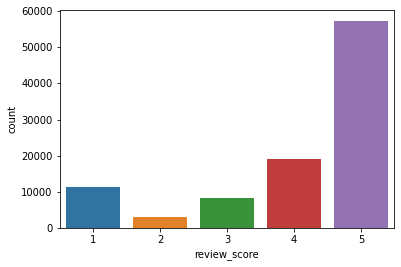

In [8]:
sns.countplot(data = reviews, x = 'review_score')

In [9]:
order_items_2 = pd.merge(order_items_1, reviews, on = 'order_id')
order_items_2.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Revenue,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03


# 1. Why choosing Bed_bath_table category to start?

## Revenue by category

In [10]:
# Count number of unique sellers in each cateogry
sellers_count_by_category = order_items_1.groupby(['product_category_name_english','seller_id']).count().reset_index().groupby('product_category_name_english')[['seller_id']].count()
sellers_count_by_category

,seller_id
product_category_name_english,
agro_industry_and_commerce,34
air_conditioning,52
art,36
arts_and_craftmanship,13
audio,36
...,...
stationery,173
tablets_printing_image,6
telephony,149


In [11]:
# Calculate Revenue per sellers
product_category_revenue = pd.merge(product_category_revenue,sellers_count_by_category, on = 'product_category_name_english')
product_category_revenue['revenue_per_seller'] = product_category_revenue['Revenue']/product_category_revenue['seller_id']
product_category_revenue.head(5)

,Revenue,seller_id,revenue_per_seller
product_category_name_english,,,
health_beauty,1441248.07,492,2929.365996
watches_gifts,1305541.61,101,12926.154554
bed_bath_table,1241681.72,196,6335.110816
sports_leisure,1156656.48,481,2404.691227
computers_accessories,1059272.40,287,3690.844599


In [12]:
product_category_revenue.iloc[2]/product_category_revenue.sum()[0]

Revenue               0.079443
seller_id             0.000013
revenue_per_seller    0.000405
Name: bed_bath_table, dtype: float64

In [13]:
tmp = product_category_revenue[:5]
tmp2 = product_category_revenue[5:].sum()
tmp = tmp.append(tmp2,ignore_index = True)
tmp['product_category_name_english'] = ['health_beauty','watches_gifts', 'bed_bath_table','sports_leisure','computers_accessories','other_categories']

In [14]:
tmp

,Revenue,seller_id,revenue_per_seller,product_category_name_english
0,1441248.07,492.0,2929.365996,health_beauty
1,1305541.61,101.0,12926.154554,watches_gifts
2,1241681.72,196.0,6335.110816,bed_bath_table
3,1156656.48,481.0,2404.691227,sports_leisure
4,1059272.40,287.0,3690.844599,computers_accessories
5,9425490.06,4795.0,123363.975263,other_categories


### Chart and Note

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe826b73cd0>],
      dtype=object)

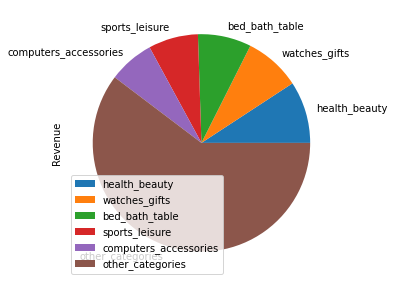

In [15]:
tmp.iloc[:,[-1,0]].set_index('product_category_name_english').plot(kind='pie',subplots=True, figsize = (15,5))

Note:
- Tổng cộng sàn Olist có 71 category, DT 15,629,890 Real ~ 3m USD trong khoảng thời gian từ cuối 2016-giữa 2018
- 5 Category phổ biến nhất chiếm 40% tổng doanh thu
- bed_bath_table đứng thứ 3, DT là 1,241,681 Real tương đương 8%

## Number of seller by category

In [16]:
product_category_revenue.head(5)

,Revenue,seller_id,revenue_per_seller
product_category_name_english,,,
health_beauty,1441248.07,492,2929.365996
watches_gifts,1305541.61,101,12926.154554
bed_bath_table,1241681.72,196,6335.110816
sports_leisure,1156656.48,481,2404.691227
computers_accessories,1059272.40,287,3690.844599


### Note
- Số lượng seller không quá nhiều nếu so với các best selling category khác
- Doanh thu tổng cao và số lượng seller TB khiến Doanh thu của mỗi seller dứng top 2, chỉ sau mỗi watches_gifts

## Total numbers of orders by category

In [17]:
frequency = order_items_1.groupby('product_category_name_english')[['order_id']].count().sort_values('order_id', ascending = False)

In [18]:
frequency.head(10)

,order_id
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


In [19]:
frequency['order_id'].sum()/frequency.iloc[0]

order_id    9.988574
Name: bed_bath_table, dtype: float64

### Note
- Xét về tổng số lượng orders, bed_bath_table là category đứng đầu với hơn 11k orders > rất nhiều KH quan tâm
- Chiếm ~10% toàn bộ số lượng orders của sàn olist

## Avarage product price by category

In [20]:
# Find total unique product_id of each category
number_of_product = order_items_1.groupby(['product_category_name_english','product_id']).count().reset_index().groupby('product_category_name_english')[['product_id']].count()
number_of_product

,product_id
product_category_name_english,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


In [21]:
product_category_revenue_1 = pd.merge(product_category_revenue,number_of_product, on = 'product_category_name_english')

In [22]:
# Calculate price per product
product_category_revenue_1 = product_category_revenue_1.rename(columns = {'product_id':'total_products_count'})
product_category_revenue_1['price_per_product'] = product_category_revenue_1['Revenue']/product_category_revenue_1['total_products_count']

In [23]:
product_category_revenue_1.head(5)

,Revenue,seller_id,revenue_per_seller,total_products_count,price_per_product
product_category_name_english,,,,,
health_beauty,1441248.07,492,2929.365996,2444,589.708703
watches_gifts,1305541.61,101,12926.154554,1329,982.348841
bed_bath_table,1241681.72,196,6335.110816,3029,409.931238
sports_leisure,1156656.48,481,2404.691227,2867,403.437907
computers_accessories,1059272.40,287,3690.844599,1639,646.291885


### Note
- bed_bath_table là cateogory có nhiều unique product ID nhất trong nhóm 5 best selling category, với hơn 3000SP
- Giá TB mỗi SP thấp. Nghĩa là các sellers mới có thể tiết kiệm từ 1.5-2 lần khi nhập cùng 1 so lượng hàng hòa từ danh mục Bed_bath_table so vs các danh mục có qui mô lớn khác

## Bed_bath_table category growth trend

In [24]:
# Merge table and change datatype to Datetime to measure growth by month
orders_1 = pd.merge(orders,order_items_1, on = 'order_id')
orders_1['order_purchase_timestamp'] = pd.to_datetime(orders_1['order_purchase_timestamp'])

In [25]:
# Extract Month-Year period of order_purchase
orders_1['order_purchase_timestamp'] = orders_1['order_purchase_timestamp'].dt.to_period('M')

In [26]:
# divine the dataframe into 5 best-selling category to make it easier to visualize
bed_bath = orders_1[orders_1['product_category_name_english'] == 'bed_bath_table']
health_beauty = orders_1[orders_1['product_category_name_english'] == 'health_beauty']
watches_gifts = orders_1[orders_1['product_category_name_english'] == 'watches_gifts']
sports_leisure = orders_1[orders_1['product_category_name_english'] == 'sports_leisure']
computers_accessories = orders_1[orders_1['product_category_name_english'] == 'computers_accessories']

In [29]:
growth = orders_1[orders_1['product_category_name_english'].isin(['health_beauty','watches_gifts','bed_bath_table','sports_leisure','computers_accessories'])].groupby(['product_category_name_english','order_purchase_timestamp'])[['Revenue']].sum().reset_index()

### chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses 

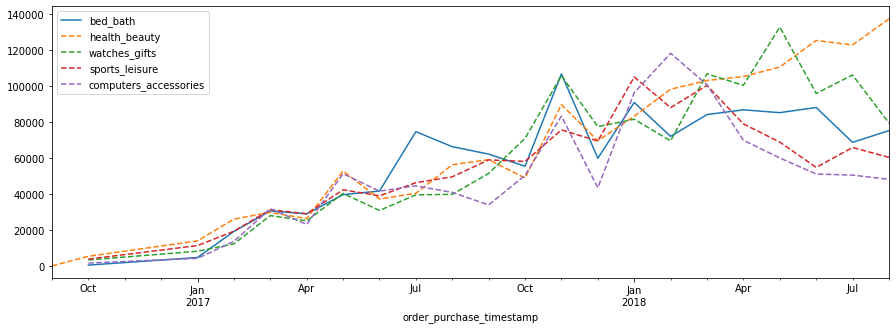

In [28]:
#Visualize growth by month
plt.figure(figsize = (15,5))
plt.subplot(111)
bed_bath[['order_purchase_timestamp','Revenue']].groupby('order_purchase_timestamp')[['Revenue']].sum().rename(columns = {'Revenue':'bed_bath'}).plot(ax = plt.subplot(111))
health_beauty[['order_purchase_timestamp','Revenue']].groupby('order_purchase_timestamp')[['Revenue']].sum().rename(columns = {'Revenue':'health_beauty'}).plot(ax = plt.subplot(111),ls = '--')
watches_gifts[['order_purchase_timestamp','Revenue']].groupby('order_purchase_timestamp')[['Revenue']].sum().rename(columns = {'Revenue':'watches_gifts'}).plot(ax = plt.subplot(111),ls = '--')
sports_leisure[['order_purchase_timestamp','Revenue']].groupby('order_purchase_timestamp')[['Revenue']].sum().rename(columns = {'Revenue':'sports_leisure'}).plot(ax = plt.subplot(111),ls = '--')
computers_accessories[['order_purchase_timestamp','Revenue']].groupby('order_purchase_timestamp')[['Revenue']].sum().rename(columns = {'Revenue':'computers_accessories'}).plot(ax = plt.subplot(111),ls = '--')
plt.show()

In [58]:
a = '2017-10'
a = pd.to_datetime(a)
growth_after_nov2017 = growth[growth['order_purchase_timestamp'] >= a.to_period('M')]

In [63]:
top_5_categories = ['bed_bath_table','health_beauty', 'watches_gifts', 'sports_leisure','computers_accessories']

In [70]:
# Calculate avarage monthly growth for 1 category and loops to other categories
avg_growth_by_month = []
for i in top_5_categories:
  x = growth_after_nov2017[growth_after_nov2017['product_category_name_english'] == i]['Revenue'].pct_change().mean()
  avg_growth_by_month.append(round(x,2))

In [76]:
pd.DataFrame({'Category':top_5_categories, 'Avarage growth by month': avg_growth_by_month}).sort_values('Avarage growth by month', ascending = False)

,Category,Avarage growth by month
1,health_beauty,0.13
0,bed_bath_table,0.09
4,computers_accessories,0.08
2,watches_gifts,0.05
3,sports_leisure,0.03


### Note
- Nhìn chung các danh mục đều tăng trưởng mạnh từ T10-2016 đến T11-2017. 
- Từ T11-2017 trở đi, chỉ có 2 danh mục cho thấy xu hướng ổn định và đi lên là Bed_bath table và Heath_beauty, 3/5 danh mục còn lại đều suy giảm doanh thu khá mạnh trong khoảng thời gian này
- Trong khoảng thời gian này tăng trưởng DT trung bình mỗi tháng của danh mục BBT đạt 9% cao thứ 2, chỉ sau danh mục Heath_beauty với mức tăng trưởng 13%

## Summary

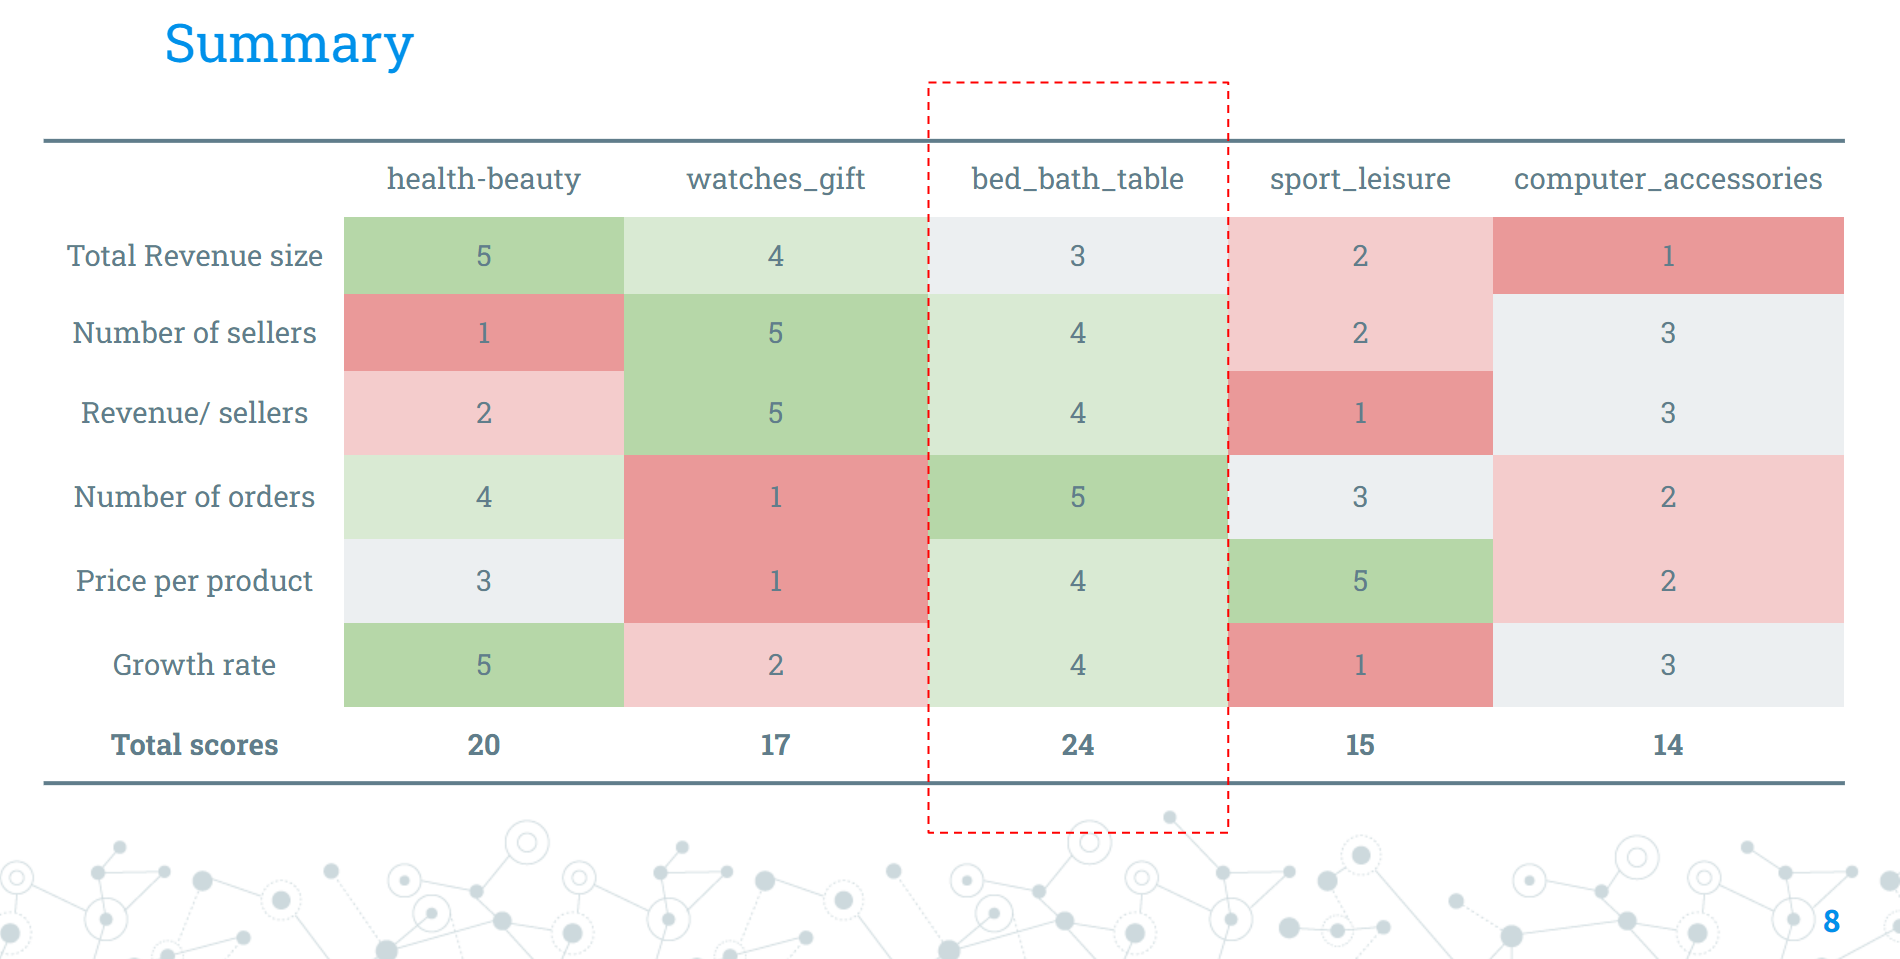

### Note
Tóm lại, dựa sao trên nữa yếu tố khách quan mà tập data này cung cấp, danh mục Bed_bath_table là ổn cho người bắt đầu bởi vì:
- Qui mô DT lớn, nằm trong top 3 danh mục đóng góp DT nhiều nhất cho Olist
- Tỉ lệ canh tranh tương đối thấp, DT/ sellers cao
- Nhu cầu KH lớn với tổng số đơn hàng cao nhất
- Giá TB mỗi SP không quá cao > dễ cho người mới kinh doanh và nhập hàng với số vốn nhỏ
- Tỉ lệ tăng trưởng ổn định


# What should new sellers attention?

## Annual peak sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


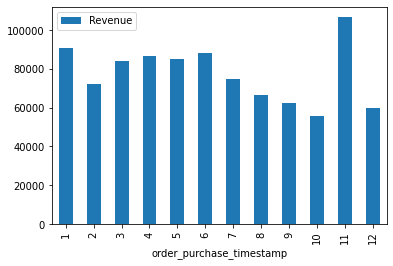

In [77]:
y2017_2018 = bed_bath[(bed_bath['order_purchase_timestamp'] >= '2017-07') & (bed_bath['order_purchase_timestamp'] < '2018-07')]
y2017_2018['order_purchase_timestamp'] = y2017_2018['order_purchase_timestamp'].dt.month
y2017_2018.groupby('order_purchase_timestamp')[['Revenue']].sum().plot(kind = 'bar')

### Note
- Doanh thu của nhóm Bed_bath thường cao và ổn định trong 6 tháng đầu năm so với 6 tháng cuối năm, do các ngày lễ lớn có thể ảnh hưởng đến Doanh số đều năm trong khoảng thời gian này
  - Consumers day: march
  - Free shipping day: april
  - Mothers’ Day: may
  - Valentine’s Day: June
- DT có xu hướng đạt đỉnh T11, Black Friday, ngày hội mua sắm lớn nhất hành hình năm trong tháng này. Đây là thời điểm mà các sellers cần đặc biệt chú ý để đảm bảo đầy đủ lượng inventory. 



## Under 2* reviews count by category

In [78]:
# Count orders_id with review_scores under 2* and group them by category
top_bad_riews = order_items_2[order_items_2['review_score'].isin([1,2])].groupby('product_category_name_english')[['order_id']].count().sort_values('order_id', ascending = False).head(10)

In [79]:
# Calculate avarage review score by category
mean_review_score = order_items_2.groupby('product_category_name_english')[['review_score']].mean()

In [80]:
pd.merge(top_bad_riews, mean_review_score, on = 'product_category_name_english')

,order_id,review_score
product_category_name_english,,
bed_bath_table,2112,3.895663
furniture_decor,1621,3.903493
computers_accessories,1461,3.930819
health_beauty,1321,4.142768
sports_leisure,1260,4.107986
housewares,1086,4.055019
watches_gifts,967,4.019160
telephony,761,3.946867
garden_tools,696,4.042735


### Note
- Bed_bath_table cateogry có số lượng review_scores dưới 2* cao nhất, và review_score TB tháp nhất ~3.9*

## What are the bad reviews?

In [81]:
# Only take the 1,2* review of Bed_bath_table category
bednbath_bad_rv = order_items_2[(order_items_2['review_score'].isin([1,2])) & (order_items_2['product_category_name_english'] == 'bed_bath_table')]
bad_reviews = bednbath_bad_rv[['review_comment_message', 'review_score']]
bad_reviews

,review_comment_message,review_score
114,"Não gostei do produto, material inferior. Imag...",2
122,NaN,1
125,NaN,1
127,NaN,1
141,As toalhas não parece nada com a que eu vi na ...,2
...,...,...
111821,capa de sofa muito horrivel pessima qualidade,1
111906,NaN,1
111962,Estou aguardando,2
112111,NaN,1


In [82]:
# Drop missing values
bad_reviews.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [83]:
bad_reviews = bad_reviews.reset_index(drop = True)

In [84]:
# Use Regex to clean the Brazilian reviews
import re
def clean_text(row):
  clean = re.sub(r"[.,?!]", "", row['review_comment_message']).lower().strip()
  return clean
bad_reviews['cleaned_text'] = bad_reviews.apply(clean_text, axis = 1)

In [85]:
# Clean escape characters
bad_reviews['cleaned_text'] = bad_reviews['cleaned_text'].str.replace('\r\n', ' ')

In [86]:
bad_reviews['cleaned_text'].sample(5)

854     só achei elas bem fraquinhas mesmo com o preço...
235     recebi os dois de cor errados já enviei de vol...
607     fia a compra de 4 jogos de lençóis de cetim e ...
516     péssimo material  falta de respeito com consum...
1277    paguei frete e tive que retirar nos correios a...
Name: cleaned_text, dtype: object

In [87]:
# Install googletrans libaries
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 42 kB 859 kB/s 
     |████████████████████████████████| 1.4 MB 22.6 MB/s 
     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=ee7718b93bd84d76b79ad8bf7d0dad7639aadab354f812e2f9a8b1ca74fd61fe
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [88]:
from googletrans import Translator
translator = Translator()

In [89]:
# Test translators with 1 review
text = bad_reviews['cleaned_text'][1312]
translator.translate(text).text

"I've been sifting through my research on single bed set and 100% cotton and unfortunately after looking at several I ended up choosing one that after completing the purchase I checked that it was a double"

In [90]:
# Function to translate every Brazilian reviews, it will take a while to run
def translate(row):
  clean_e = translator.translate(row['cleaned_text']).text
  return clean_e
bad_reviews['cleaned_text_e'] = bad_reviews.apply(translate, axis = 1)

In [91]:
bad_reviews.head(5)

,review_comment_message,review_score,cleaned_text,cleaned_text_e
0,"Não gostei do produto, material inferior. Imag...",2,não gostei do produto material inferior imagin...,I didn't like the product inferior material I ...
1,As toalhas não parece nada com a que eu vi na ...,2,as toalhas não parece nada com a que eu vi na ...,the towels don't look anything like the ones i...
2,"NÃO RECEBI O PRODUTO, O PRODUTO CONSTA COMO EN...",1,não recebi o produto o produto consta como env...,I didn't receive the product the product appea...
3,"toalhas muito finas, qualidade inferior",1,toalhas muito finas qualidade inferior,very thin towels inferior quality
4,"toalhas muito finas, qualidade inferior",1,toalhas muito finas qualidade inferior,very thin towels inferior quality


In [92]:
# import nltk libaries for using Bigram
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [93]:
def bigram_output(review):
    tokens = nltk.word_tokenize(review)
    bigrm = nltk.bigrams(tokens)
    return list(map(' '.join, bigrm))

In [94]:
# Count the pairt of words that appear most time
result_dict = {}
stops = ['product has','product is','is not','the product','I bought', 'I did', 'and I', 'of the','I received', "I 'm",'received the','I have','on the','for the','in the','I do','and the',"did n't",'it was','receive the','did not','with the','and it',"do n't","it 's",", I","to be","to the", 'I am', 'I was','my product','product and','I will','I would','for a',', the','product I','product was','it is','to know','from the','the store']
def count_word(review):
    words = bigram_output(review)
    for word in words:
      if word not in stops:
        if word not in result_dict:
            result_dict[word] = 1
        elif word in result_dict:
            result_dict[word] += 1

bad_reviews['cleaned_text_e'].apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
1618    None
1619    None
1620    None
1621    None
1622    None
Name: cleaned_text_e, Length: 1623, dtype: object

In [95]:
pd.Series(result_dict).sort_values(ascending=False)[:50]

have n't          118
only received     116
n't received      105
I only            104
only one           99
waiting for        98
n't receive        94
so far             75
'm waiting         73
was delivered      73
received only      73
bought two         71
only 1             69
still have         66
I still            65
have not           65
bought 2           63
the purchase       62
I want             62
was not            61
the same           60
the website        56
it came            54
the photo          53
the other          51
because I          50
the delivery       49
but the            48
not receive        48
and they           48
and only           48
not received       47
poor quality       47
the order          46
post office        46
but I              46
received one       46
n't like           46
ca n't             45
has not            45
been delivered     43
received it        41
the color          40
bought a           40
like the           40
the post  

### Chart and note

<Figure size 720x720 with 0 Axes>

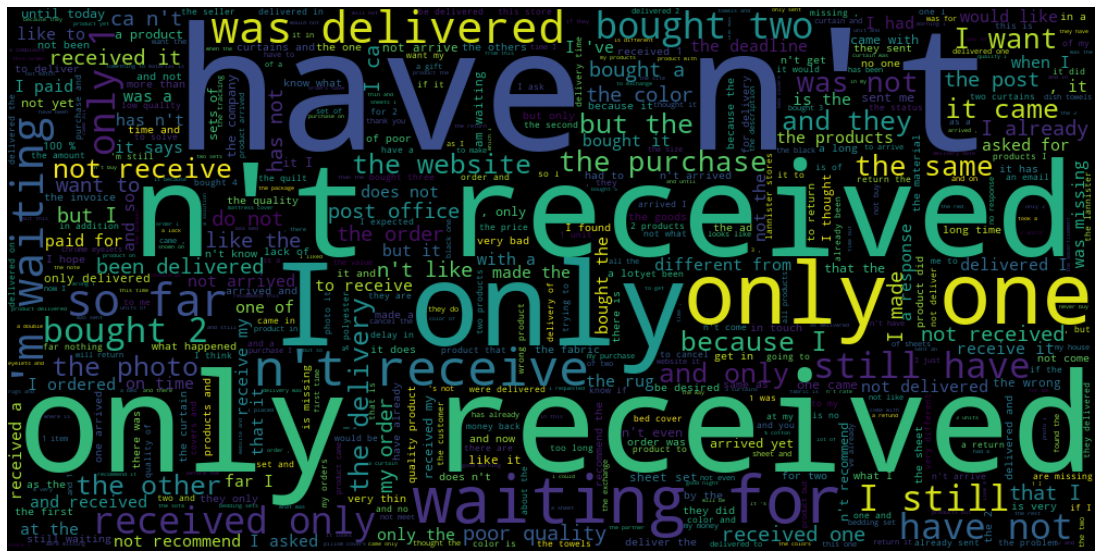

In [96]:
#Visualize with World cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words = WC.generate_from_frequencies(result_dict)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.margins(0)
plt.imshow(words,interpolation='bilinear')
plt.show()

Note:
Các review 1-2* cho thấy customers chủ yếu đang không hài lòng về:
- Late delivery
- Wrong delivery (đặt màu này mà gửi màu khác)/ Short delivery (ví dụ mua 2 sp mà chỉ giao 1 SP)
- Product quality (chất liệu,màu sắc thực tế không giống hình, thiếu linh kiện...)

# Further investigate in late delivery issue

In [97]:
# Drop unnecessary columns
order_items_3 = order_items_2.drop(columns = ['order_item_id','product_id', 'seller_id','price', 'freight_value', 'Revenue','product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm','review_id', 'review_comment_title', 'review_comment_message','review_creation_date', 'review_answer_timestamp'] )

In [98]:
order_items_3.head(6)

,order_id,shipping_limit_date,product_category_name_english,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35,cool_stuff,5
1,130898c0987d1801452a8ed92a670612,2017-07-05 02:44:11,cool_stuff,5
2,532ed5e14e24ae1f0d735b91524b98b9,2018-05-23 10:56:25,cool_stuff,4
3,6f8c31653edb8c83e1a739408b5ff750,2017-08-07 18:55:08,cool_stuff,5
4,7d19f4ef4d04461989632411b7e588b9,2017-08-16 22:05:11,cool_stuff,5
5,a0f9acf0b6294ed8561e32cde1a966bc,2017-08-03 15:23:46,cool_stuff,5


In [99]:
order_items_3 = pd.merge(order_items_3, orders, on = 'order_id')

In [100]:
delivery_bedbath = order_items_3[(order_items_3['product_category_name_english'] == 'bed_bath_table')]

In [101]:
delivery_bedbath.dropna(inplace = True)
delivery_bedbath.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [102]:
delivery_bedbath.head(1)

,order_id,shipping_limit_date,product_category_name_english,review_score,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
102,0006ec9db01a64e59a68b2c340bf65a7,2018-07-26 17:24:20,bed_bath_table,5,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22 00:00:00


In [103]:
# Convert needed data to Datetime datatype
delivery_bedbath['order_delivered_customer_date'] = pd.to_datetime(delivery_bedbath['order_delivered_customer_date'])
delivery_bedbath['order_estimated_delivery_date'] = pd.to_datetime(delivery_bedbath['order_estimated_delivery_date'])
delivery_bedbath['order_approved_at'] = pd.to_datetime(delivery_bedbath['order_approved_at'])
delivery_bedbath['order_delivered_carrier_date'] = pd.to_datetime(delivery_bedbath['order_delivered_carrier_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [104]:
delivery_bedbath.rename(columns = {'order_delivered_customer_date':'delivered_customer','order_estimated_delivery_date':'estimated','order_approved_at':'approved','order_delivered_carrier_date':'delivered_carrier'}, inplace = True)
# Calculate the difference between estimted delivery date and actual delivery date (difference_2)
delivery_bedbath['difference_2'] = delivery_bedbath['estimated'] - delivery_bedbath['delivered_customer']
delivery_bedbath['difference_2'] = delivery_bedbath['difference_2'].dt.days

# Calculate the time it takes for sellers to process the order and delivery to carrier after the order is approved (difference_1)
delivery_bedbath['difference_1'] = delivery_bedbath['delivered_carrier'] - delivery_bedbath['approved']
delivery_bedbath['difference_1'] = delivery_bedbath['difference_1'].dt.days


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [105]:
# Function to check whether the order is delivered late or on time
def check_late(row):
  if row['difference_2'] >= 0:
    return 'Not late'
  else:
    return 'Late'
delivery_bedbath['Late_status'] = delivery_bedbath.apply(check_late, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Chart Late and Note late orders in different reviews score groups

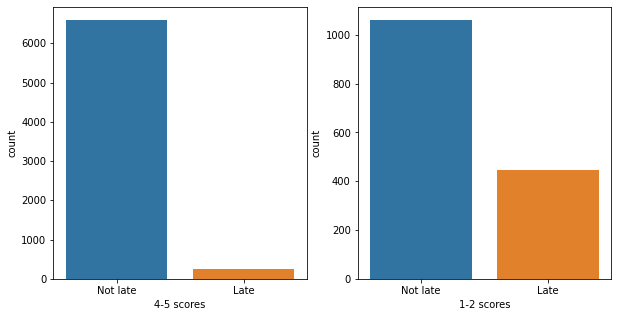

In [106]:
# Visualize late/notlate order of 4-5* reviews compared to that of 1-2* reviews
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.countplot(data = delivery_bedbath[delivery_bedbath['review_score'].isin([4,5])], x= 'Late_status')
plt.xlabel('4-5 scores')
plt.subplot(122)
sns.countplot(data = delivery_bedbath[delivery_bedbath['review_score'].isin([1,2])], x= 'Late_status')
plt.xlabel('1-2 scores')
plt.show()

- Đối với các đơn hàng 4-5*, Late ratio: 0.04
- Đối với các đơn hàng 1-2*, Late ratio: 0.42
> Trong số các đơn bị đánh giá từ 1-2* thì số dơn giao trễ chiếm đến gần 1 nửa, tỉ lệ giao hàng trễ cao gấp 10 lần > Điều này cho thấy vấn đề giao hàng trễ ảnh hướng rất nhiều đến review score

### Peak late delivery month of Bed_bath_table category bar chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


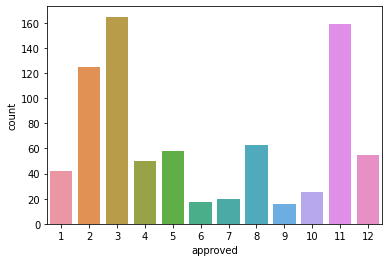

In [ ]:
late_delivery = delivery_bedbath[delivery_bedbath['Late_status'] == 'Late']
late_delivery['approved'] = late_delivery['approved'].dt.month
sns.countplot(data = late_delivery, x= 'approved')

In [ ]:
delivery_bedbath[delivery_bedbath['Late_status'] == 'Not late']['difference_1'].mean()

1.9976448422044277

In [ ]:
delivery_bedbath[delivery_bedbath['Late_status'] == 'Late']['difference_1'].mean()

4.659119496855346

Note:
- Các đơn không trễ có difference_1 TB là 2 ngày (Sellers mất TB 2 ngày để xử lý và chuyển đơn hàng cho carriers- đơn vị vận chuyển)
- Các đơn trễ có difference_1 cao hơn khoảng 2.5 lần
> Nếu sellers cố giao hàng cho carriers sớm thì có cải thiện dc late ratio không?

In [107]:
# Calculate IQR and upper/lower wisker
q1 = delivery_bedbath['difference_1'].quantile(0.25)
q3 = delivery_bedbath['difference_1'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 -1.5*iqr

In [108]:
# Remove outliers
delivery_bedbath_no_ouliers = delivery_bedbath[(delivery_bedbath['difference_1'] >= lower) & (delivery_bedbath['difference_1'] <= upper)]

In [109]:
a = delivery_bedbath_no_ouliers[['Late_status', 'difference_1']].groupby(['difference_1','Late_status'])[['Late_status']].count()

In [110]:
a = a.rename(columns = {'Late_status':'count'}).reset_index()

In [111]:
b = pd.merge((a[a['Late_status'] == 'Not late']),(a[a['Late_status'] == 'Late']), on = 'difference_1', how = 'left')

In [112]:
b = b.iloc[4:]

In [113]:
b['late_ratio'] = b['count_y']/b['count_x']

In [114]:
b

,difference_1,Late_status_x,count_x,Late_status_y,count_y,late_ratio
4,0,Not late,2375,Late,116.0,0.048842
5,1,Not late,2123,Late,178.0,0.083844
6,2,Not late,1351,Late,121.0,0.089563
7,3,Not late,901,Late,92.0,0.102109
8,4,Not late,593,Late,67.0,0.112985
9,5,Not late,395,Late,48.0,0.121519
10,6,Not late,233,Late,33.0,0.141631
11,7,Not late,125,Late,18.0,0.144000


### Lead day and late ration scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


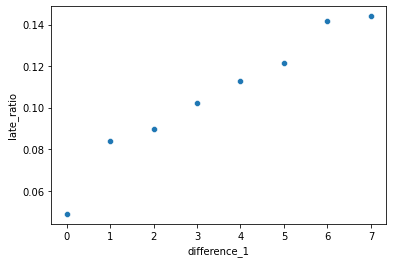

In [ ]:
sns.scatterplot(b['difference_1'], b['late_ratio'])

- Sau khi bỏ các outliers thì 0-7 ngày là khoảng thời gian mà sellers thường mất để xử lý đơn hàng và giao cho carriers
- Late delivery rate và lead day là 2 biến có mối tương quan dương, với mỗi 1 ngày lead day tăng lên thì late delivery ratio có xu tướng tăng thêm trung bình 1.5-2%

# Sales Forecast with Time-series

## Linear regression

In [ ]:
import datetime
import os
import random
import re
from itertools import cycle, product

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
N_FEATURES = 7

In [ ]:
orders_2 = pd.merge(orders, order_items_1,on = 'order_id')

In [ ]:
bbt_orders = orders_2[orders_2['product_category_name_english'] == 'bed_bath_table']

In [ ]:
full_history = pd.to_datetime(bbt_orders['order_purchase_timestamp']).dt.date

In [ ]:
start = full_history.min()
end = full_history.max()
idx = pd.date_range(start, end, normalize=True)
full_history = (
    full_history
    .value_counts(sort=False)
    .sort_index()
    .reindex(idx, fill_value=0)
)

In [ ]:
full_history.tail(20)

2018-08-09    37
2018-08-10    21
2018-08-11    24
2018-08-12    12
2018-08-13    40
2018-08-14    31
2018-08-15    30
2018-08-16    37
2018-08-17    24
2018-08-18    27
2018-08-19    23
2018-08-20    25
2018-08-21    28
2018-08-22    20
2018-08-23    12
2018-08-24     7
2018-08-25     8
2018-08-26     4
2018-08-27     7
2018-08-28     5
Freq: D, Name: order_purchase_timestamp, dtype: int64

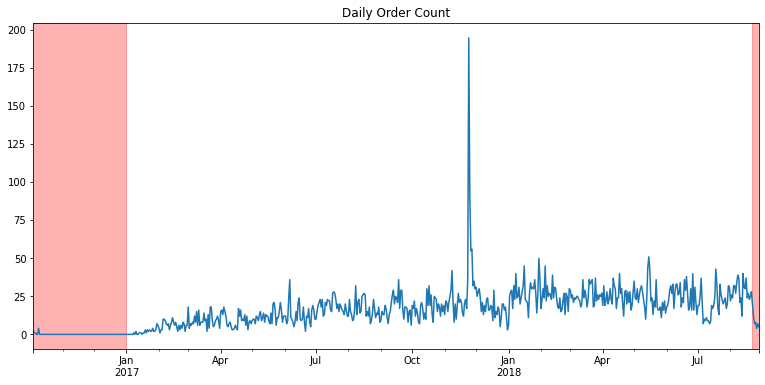

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
full_history.plot(ax=ax)
ax.axvspan(datetime.date(2016, 9, 1), datetime.date(2017, 1, 1), color='red', alpha=0.3)
ax.axvspan(datetime.date(2018, 8, 22), datetime.date(2018, 8, 28), color='red', alpha=0.3)
ax.set_title('Daily Order Count')
plt.show()

In [ ]:
# Remove outliers
history = full_history[datetime.date(2017, 1, 1): datetime.date(2018, 8, 22)]
pred_period = pd.date_range(datetime.date(2018, 8, 22), datetime.date(2018, 10, 22))

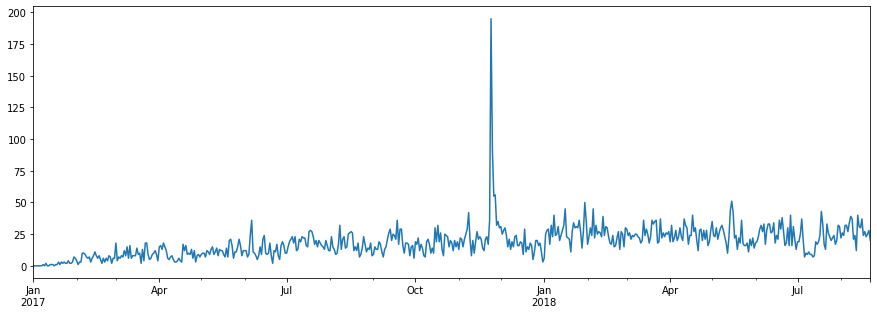

In [ ]:
history.plot(figsize = (15,5))

In [ ]:
# Data Splitting
tscv = TimeSeriesSplit(max_train_size=pred_period.shape[0], test_size=pred_period.shape[0])

In [ ]:
title = 'Time-Series Regression'
data = history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, y_test = data.iloc[train_id], data.iloc[test_id]
    gen = TimeseriesGenerator(train, train, length=N_FEATURES, batch_size=1000)
    X_train = gen[0][0]
    y_train = gen[0][1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_pred = y_train[-N_FEATURES:].reshape(1,-1)
    y_pred = np.empty(y_test.shape[0])
    for i in range(len(y_pred)):
        forecast = lr.predict(X_pred)
        X_pred = np.delete(X_pred, 0, 1)
        X_pred = np.concatenate((X_pred, forecast.reshape(-1,1)), 1)    
        y_pred[i] = forecast
    mse.append(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


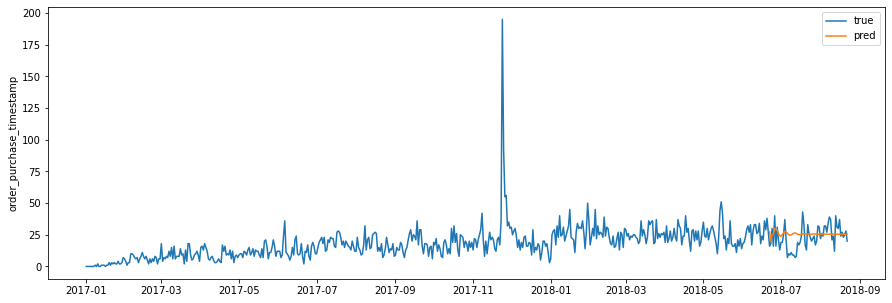

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(111)
sns.lineplot(x=history.index, y=history, label='true', ax=plt.subplot(111))
sns.lineplot(x=y_test.index, y=y_pred, label='pred', ax=plt.subplot(111))

In [ ]:
np.mean(mse)

198.64272714329647

## Exponential smoothing

In [ ]:
title = 'Exponential Smoothing'
data = history.copy()
mse_ex = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit(method='ls')
    pred = ES.forecast(test.shape[0])
    mse_ex.append(mean_squared_error(pred, test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/pyth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


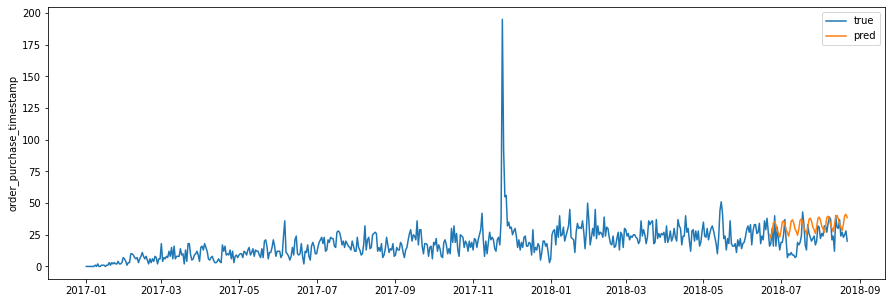

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(111)
sns.lineplot(x=history.index, y=history, label='true', ax=plt.subplot(111))
sns.lineplot(x=y_test.index, y=pred, label='pred', ax=plt.subplot(111))

In [ ]:
np.mean(mse_ex)

313.37419069213536

In [ ]:
# Grid Searching on the best Parameters

def gscv(alpha, beta, gamma):
    global history
    data = history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]
        ES = (
            ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
            .fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method='ls')
        )
        pred = ES.forecast(test.shape[0])
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

alphas = betas = gammas = np.arange(1, step=0.1)
tuning = pd.DataFrame(product(alphas, betas, gammas), columns=['alpha', 'beta', 'gamma'])
tuning

,alpha,beta,gamma
0,0.0,0.0,0.0
1,0.0,0.0,0.1
2,0.0,0.0,0.2
3,0.0,0.0,0.3
4,0.0,0.0,0.4
...,...,...,...
995,0.9,0.9,0.5
996,0.9,0.9,0.6
997,0.9,0.9,0.7
998,0.9,0.9,0.8


In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.alpha, x.beta, x.gamma), axis=1)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprec

CPU times: user 1min 31s, sys: 4.49 s, total: 1min 36s
Wall time: 1min 33s


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
tuning.query('mse == mse.min()')

,alpha,beta,gamma,mse
209,0.2,0.0,0.9,237.886388


In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(smoothing_level=0.2, smoothing_trend=0.0, smoothing_seasonal=0.9, method='ls')
    )
    pred = ES.forecast(test.shape[0])
    mse.append(mean_squared_error(pred, test))
# plot(test.index, pred, mse, title, figs, axs[0])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/pyth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


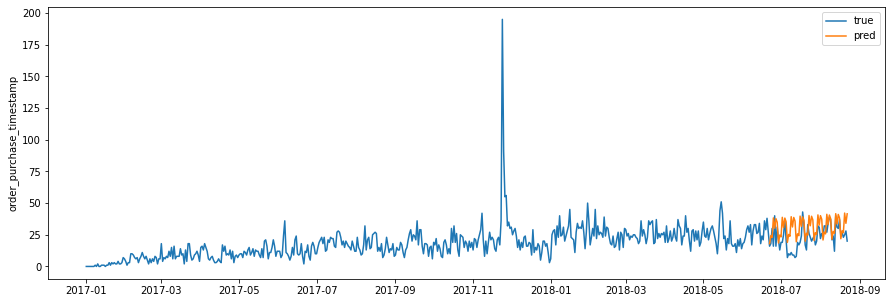

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(111)
sns.lineplot(x=history.index, y=history, label='true', ax=plt.subplot(111))
sns.lineplot(x=y_test.index, y=pred, label='pred', ax=plt.subplot(111))

In [ ]:
np.mean(mse)

237.8863880056048

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


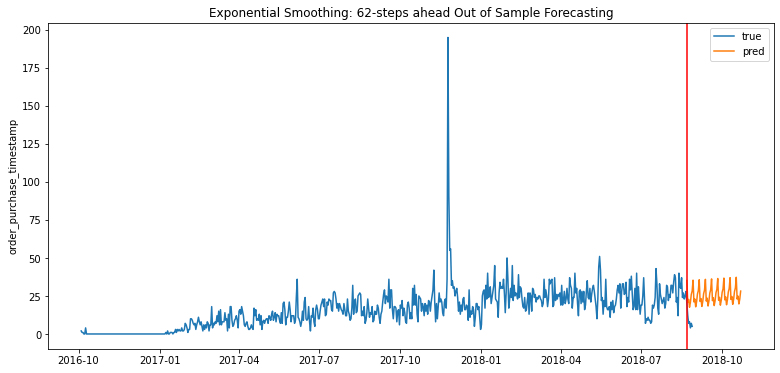

In [ ]:
ES = (
    ExponentialSmoothing(history, trend='add', seasonal='add', seasonal_periods=7)
    .fit(smoothing_level=0.2, smoothing_trend=0.0, smoothing_seasonal=0.9, method='ls')
)
pred = ES.forecast(pred_period.shape[0])

fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(x=full_history.index, y=full_history, label='true')
sns.lineplot(x=pred_period, y=pred, label='pred')
ax.axvline(x=pred_period[0], color='red')
ax.set_title('Exponential Smoothing: 62-steps ahead Out of Sample Forecasting')
plt.show()